In [1]:
## Revannath Assignment for the Fraud_check data

In [2]:
## Now Import all required libraries as per the company data example

In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
import seaborn as sb

In [7]:
import matplotlib.pyplot as plt

In [9]:
from sklearn import tree

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
fraud_data= pd.read_csv('Fraud_check.csv')

In [13]:
fraud_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [14]:
fraud_data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [15]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [16]:
## cheking all null values##

In [17]:
null = fraud_data.isnull().any(axis = 1)

In [18]:
null.describe()

count       600
unique        1
top       False
freq        600
dtype: object

In [19]:
#Showing there are no null values present in the dataframe

In [20]:
fraud_data.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [21]:
## now we going to change the vale for DOT because of code weill not runn properly

In [22]:
fraud_data.rename(columns={'Marital.Status':'Marital_Status', 'Taxable.Income':'Taxable_Income', 'City.Population':'City_Population', 'Work.Experience':'Work_Experience'},inplace= True)

In [23]:
##will insert a column at the 0th position

In [24]:
fraud_data.insert(0,"output",str)

In [25]:
#y = fraud_data.iloc[:,2]
#type(y)

In [26]:
fraud_data.loc[fraud_data.Taxable_Income<=30000,"output"] = "Risky"

In [27]:
fraud_data.loc[fraud_data.Taxable_Income>30000,"output"] = "Good"

In [28]:
fraud_data['output'].describe()

count      600
unique       2
top       Good
freq       476
Name: output, dtype: object

In [29]:
type(fraud_data.output)

pandas.core.series.Series

In [31]:
##then cheking all null value repeataly 

In [32]:
fraud_data[fraud_data.isnull().any(axis = 1)]

,output,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban


In [33]:
# There are no null values in the data.

In [35]:
print(fraud_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   output           600 non-null    object
 1   Undergrad        600 non-null    object
 2   Marital_Status   600 non-null    object
 3   Taxable_Income   600 non-null    int64 
 4   City_Population  600 non-null    int64 
 5   Work_Experience  600 non-null    int64 
 6   Urban            600 non-null    object
dtypes: int64(3), object(4)
memory usage: 32.9+ KB
None


In [36]:
print(fraud_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   output           600 non-null    object
 1   Undergrad        600 non-null    object
 2   Marital_Status   600 non-null    object
 3   Taxable_Income   600 non-null    int64 
 4   City_Population  600 non-null    int64 
 5   Work_Experience  600 non-null    int64 
 6   Urban            600 non-null    object
dtypes: int64(3), object(4)
memory usage: 32.9+ KB
None


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='City_Population'>

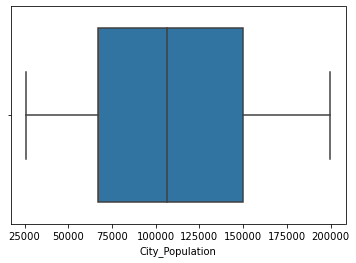

In [37]:
sb.boxplot(fraud_data.City_Population)##cheking for model building 

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Work_Experience'>

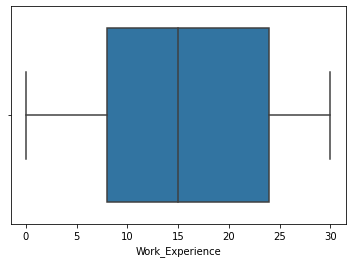

In [38]:
sb.boxplot(fraud_data.Work_Experience)

In [39]:
## there are no outliers in the numerical data 

In [40]:
##will plot some graphs for the remaining data

In [41]:
fraud_data.columns

Index(['output', 'Undergrad', 'Marital_Status', 'Taxable_Income',
       'City_Population', 'Work_Experience', 'Urban'],
      dtype='object')

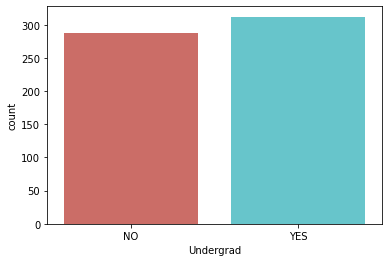

In [42]:
graph1 = sb.countplot(x = 'Undergrad', data = fraud_data,palette = 'hls')

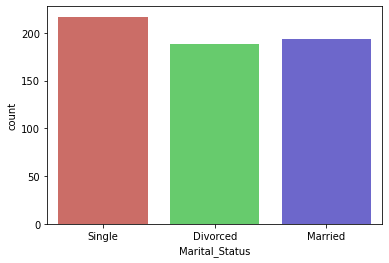

In [43]:
graph2 = sb.countplot(x = 'Marital_Status', data = fraud_data, palette = 'hls')

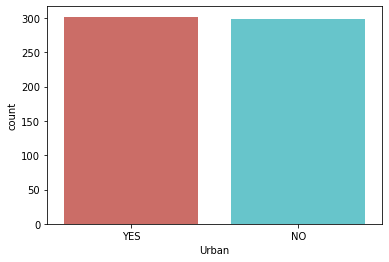

In [44]:
graph2 = sb.countplot(x = 'Urban', data = fraud_data, palette = 'hls')

In [45]:
## now we can also plot the bar against the output

<AxesSubplot:xlabel='Marital_Status'>

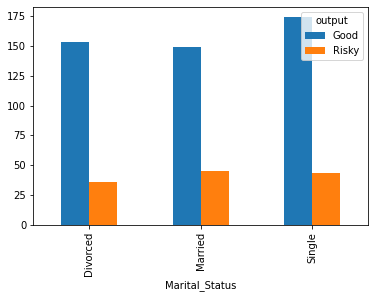

In [46]:
pd.crosstab(fraud_data.Marital_Status,fraud_data.output).plot(kind = 'bar')

<AxesSubplot:xlabel='output'>

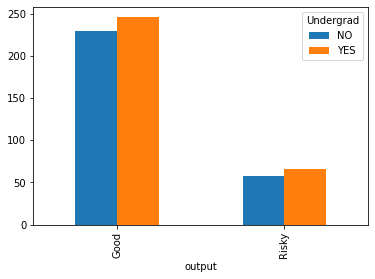

In [47]:
pd.crosstab(fraud_data.output,fraud_data.Undergrad).plot(kind = 'bar')

<AxesSubplot:xlabel='Urban'>

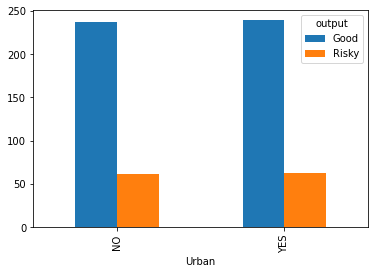

In [48]:
pd.crosstab(fraud_data.Urban,fraud_data.output).plot(kind = 'bar')

In [49]:
## Now the above visual looking good and we are going to fine with data and now manage the data in proper way

In [50]:
fraud_data["Undergrad"].value_counts()

YES    312
NO     288
Name: Undergrad, dtype: int64

In [51]:
fraud_data["Marital_Status"].value_counts()

Single      217
Married     194
Divorced    189
Name: Marital_Status, dtype: int64

In [52]:
fraud_data["Urban"].value_counts()

YES    302
NO     298
Name: Urban, dtype: int64

In [53]:
fraud_data["output"].value_counts()

Good     476
Risky    124
Name: output, dtype: int64

In [54]:
val_replace = {"Undergrad" : {"YES":1,"NO":0}, "Marital_Status" : {"Single":1, "Married":2, "Divorced":3},
               "Urban" : {"YES":1,"NO":0}, "output" : {"Good": 1, "Risky": 0}}

In [55]:
x = fraud_data.replace(val_replace).copy()

In [56]:
x.drop("Taxable_Income",axis = 1, inplace = True)

In [57]:
## we going to remove the tax columns which not much useful for our assignment

In [58]:
colnames = list(x.columns)

In [59]:
predictors = colnames[1:]

In [60]:
target = colnames[0]

In [63]:
## now for train and test

In [64]:
train,test = train_test_split(x,test_size = 0.2)

In [66]:
model = DecisionTreeClassifier(criterion = 'entropy')## Entropy

In [67]:
##fitting data to our model

In [68]:
model.fit(train[predictors],train[target].astype(int))

DecisionTreeClassifier(criterion='entropy')

In [69]:
fitted_model = model.fit(train[predictors],train[target].astype(int))

In [70]:
## will predict the data on the base of above 

In [71]:
model.predict(test[predictors])

array([1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1])

In [72]:
pred = pd.Series(model.predict(test[predictors]))

In [73]:
##lets try to polt the decision tree

[Text(158.33778409090908, 212.71304347826086, 'X[3] <= 6.5\nentropy = 0.73\nsamples = 480\nvalue = [98, 382]'),
 Text(34.663636363636364, 203.2591304347826, 'X[3] <= 5.5\nentropy = 0.595\nsamples = 97\nvalue = [14, 83]'),
 Text(31.28181818181818, 193.80521739130435, 'X[1] <= 1.5\nentropy = 0.664\nsamples = 81\nvalue = [14, 67]'),
 Text(10.145454545454545, 184.3513043478261, 'X[2] <= 135447.5\nentropy = 0.371\nsamples = 28\nvalue = [2, 26]'),
 Text(6.763636363636364, 174.89739130434782, 'entropy = 0.0\nsamples = 21\nvalue = [0, 21]'),
 Text(13.527272727272727, 174.89739130434782, 'X[0] <= 0.5\nentropy = 0.863\nsamples = 7\nvalue = [2, 5]'),
 Text(10.145454545454545, 165.44347826086957, 'X[3] <= 2.0\nentropy = 0.918\nsamples = 3\nvalue = [2, 1]'),
 Text(6.763636363636364, 155.98956521739132, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(13.527272727272727, 155.98956521739132, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(16.90909090909091, 165.44347826086957, 'entropy = 0.0

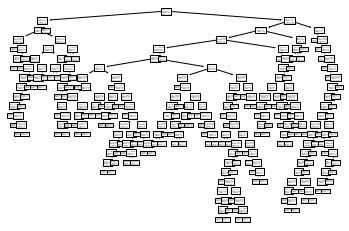

In [74]:
tree.plot_tree(fitted_model)

In [75]:
type(pred)

pandas.core.series.Series

In [76]:
pred.value_counts()

1    95
0    25
dtype: int64

In [77]:
pd.crosstab(test[target],pred)

col_0,0,1
output,,
0,2,4
1,2,19


In [78]:
##'1' belong for 'Good' and '0' belong for 'Risky'

In [79]:
print('Accuracy', (14+1)/(1+3+2+14)*100)

Accuracy 75.0


In [80]:
## accuracy for train and test ## 

In [81]:
train[target].dtype

dtype('int64')

In [82]:
type(train[target])

pandas.core.series.Series

In [83]:
acc = np.mean(pred == train[target].reset_index(drop = True, inplace = True))

In [84]:
acc

0.0

In [ ]:
## same type proble with Campany data , only visual are getting different on basis of provided data